In [18]:
import torch
from torchvision import transforms
from torchvision import datasets
from ModelToys import LinearModel
from torch.utils.data import DataLoader
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
transforms.ToTensor(1)
# TypeError: __init__() takes 1 positional argument but 3 were given
# 注意看， ToTensor是一个class，__init__只接收一个参数。默认会把自己当作self传入，如果再传1，就是给了2个参数


In [22]:
norm_transform = \
    transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
# prepare data
train_data = datasets.MNIST("../data/", train=True, transform=norm_transform, download=False)
test_data_xy = datasets.MNIST("../data/", train=False, transform=norm_transform, download=False)
print(len(train_data))
print(train_data[0])
datasize = len(train_data)

60000
(tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4

In [25]:
batch_size = 500
train_data_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, num_workers=4)
test_data_loader = DataLoader(dataset=test_data_xy, shuffle=True, num_workers=0)

In [ ]:
# build model
model = LinearModel()

In [ ]:
optim_f = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
loss_f = torch.nn.CrossEntropyLoss(size_average=True)


In [29]:
epoch = 20
loss_history = []
for i in range(epoch):
    curr_loss = 0
    for idx, data in enumerate(train_data_loader):
        data, target = data
        print(data.__class__)
        data = data.view(-1, 28 * 28)
        print("x=", data.shape)
        y_pred = model.forward(data)
        optim_f.zero_grad()
        loss = loss_f(y_pred, target)
        curr_loss = loss.item()
        loss.backward()
        optim_f.step()
        clear_output()
    loss_history.append(curr_loss)



[1.110948920249939, 1.0186641216278076, 1.0572972297668457, 0.9492689967155457, 1.0518978834152222, 1.108508825302124, 1.0252337455749512, 1.0057330131530762, 0.9922029376029968, 1.0930981636047363, 1.010758876800537, 1.0180168151855469, 0.9427827000617981, 0.98869788646698, 1.0706813335418701, 1.0075538158416748, 0.9618152379989624, 0.9368079900741577, 1.1007291078567505, 1.0141668319702148]


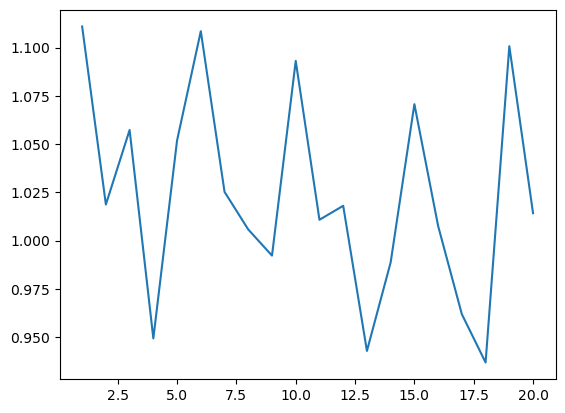

In [31]:
iteration = int(datasize / batch_size)

x = np.linspace(1, epoch, epoch)
print(loss_history)

plt.plot(x, loss_history)